In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#leemos los datasets
train = pd.read_csv("Training_Dataset.csv")
train.info()
train.head()

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
train.drop(columns = ["sku"], axis = "columns", inplace = True)
train.dropna(inplace = True)

In [4]:
train.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06
mean,4.895098e+02,7.872267e+00,4.547493e+01,1.887439e+02,3.653390e+02,5.362801e+02,5.691140e+01,1.784835e+02,3.522319e+02,5.441272e+02,5.320380e+01,2.172666e+00,-1.014934e+00,-5.532225e-01,6.333207e-01
std,3.046168e+04,7.056024e+00,1.309357e+03,5.182992e+03,1.009962e+04,1.482576e+04,1.854775e+03,4.971129e+03,9.679297e+03,1.514871e+04,1.119034e+03,2.434021e+02,1.327273e+01,1.144580e+01,3.343933e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e-01,6.900000e-01,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.400000e-01,8.200000e-01,0.000000e+00
75%,7.800000e+01,9.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.500000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.000000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,2.057860e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586967 entries, 1 to 1687859
Data columns (total 22 columns):
national_inv         1586967 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1586967 non-null float64
forecast_3_month     1586967 non-null float64
forecast_6_month     1586967 non-null float64
forecast_9_month     1586967 non-null float64
sales_1_month        1586967 non-null float64
sales_3_month        1586967 non-null float64
sales_6_month        1586967 non-null float64
sales_9_month        1586967 non-null float64
min_bank             1586967 non-null float64
potential_issue      1586967 non-null object
pieces_past_due      1586967 non-null float64
perf_6_month_avg     1586967 non-null float64
perf_12_month_avg    1586967 non-null float64
local_bo_qty         1586967 non-null float64
deck_risk            1586967 non-null object
oe_constraint        1586967 non-null object
ppap_risk            1586967 non-null object
stop_auto_buy    

(array([4.96755e+05, 8.25601e+05, 2.20325e+05, 1.32710e+04, 3.18000e+02,
        5.01000e+02, 3.50000e+01, 4.80000e+01, 0.00000e+00, 3.01130e+04]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

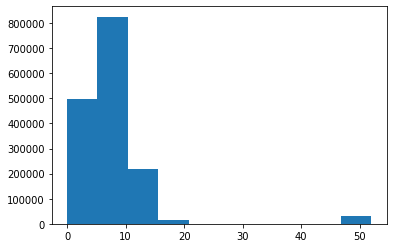

In [6]:
plt.hist(train["lead_time"])

(array([1.586932e+06, 1.400000e+01, 7.000000e+00, 0.000000e+00,
        0.000000e+00, 7.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 7.000000e+00]),
 array([  -27256.,  1208910.,  2445076.,  3681242.,  4917408.,  6153574.,
         7389740.,  8625906.,  9862072., 11098238., 12334404.]),
 <a list of 10 Patch objects>)

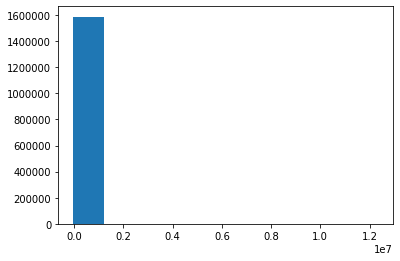

In [7]:
plt.hist(train["national_inv"])

In [8]:
mask = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]
dfTrain = pd.get_dummies(train, columns = mask)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586967 entries, 1 to 1687859
Data columns (total 29 columns):
national_inv             1586967 non-null float64
lead_time                1586967 non-null float64
in_transit_qty           1586967 non-null float64
forecast_3_month         1586967 non-null float64
forecast_6_month         1586967 non-null float64
forecast_9_month         1586967 non-null float64
sales_1_month            1586967 non-null float64
sales_3_month            1586967 non-null float64
sales_6_month            1586967 non-null float64
sales_9_month            1586967 non-null float64
min_bank                 1586967 non-null float64
pieces_past_due          1586967 non-null float64
perf_6_month_avg         1586967 non-null float64
perf_12_month_avg        1586967 non-null float64
local_bo_qty             1586967 non-null float64
potential_issue_No       1586967 non-null uint8
potential_issue_Yes      1586967 non-null uint8
deck_risk_No             1586967 non-null

In [9]:
dfTrain.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes,went_on_backorder_No,went_on_backorder_Yes
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,1,0,1,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,1,0,1,0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,1,0,1,0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,1,0,1,0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,1,0,1,0


In [10]:
colYes = []
colNo = []
for col in dfTrain.columns:
    if col.endswith("No"):
        colNo.append(col)
print(colNo)

['potential_issue_No', 'deck_risk_No', 'oe_constraint_No', 'ppap_risk_No', 'stop_auto_buy_No', 'rev_stop_No', 'went_on_backorder_No']


In [11]:
dfTrain.drop(columns = colNo, axis = "columns", inplace = True)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586967 entries, 1 to 1687859
Data columns (total 22 columns):
national_inv             1586967 non-null float64
lead_time                1586967 non-null float64
in_transit_qty           1586967 non-null float64
forecast_3_month         1586967 non-null float64
forecast_6_month         1586967 non-null float64
forecast_9_month         1586967 non-null float64
sales_1_month            1586967 non-null float64
sales_3_month            1586967 non-null float64
sales_6_month            1586967 non-null float64
sales_9_month            1586967 non-null float64
min_bank                 1586967 non-null float64
pieces_past_due          1586967 non-null float64
perf_6_month_avg         1586967 non-null float64
perf_12_month_avg        1586967 non-null float64
local_bo_qty             1586967 non-null float64
potential_issue_Yes      1586967 non-null uint8
deck_risk_Yes            1586967 non-null uint8
oe_constraint_Yes        1586967 non-null

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
#Dividimos en etiquetas y caracteristicas para entrenar el modelo y calcular la precision 
label = dfTrain["went_on_backorder_Yes"]
features = dfTrain.drop(columns = "went_on_backorder_Yes", axis = "columns")

In [14]:
# Se divide la data Train en dos para entrenar y calcular la precision
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)

In [15]:
#Normalizamos para tener una mean = 0 y desviacion = 1 
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [16]:
#Se crea otro modelo con otra biblioteca
xgb_classifier = XGBClassifier(n_jobs = -1)
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [17]:
cm_xgb_classifier = confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb_classifier,end='\n\n')

[[472778     46]
 [  3228     39]]



In [18]:
numerator = cm_xgb_classifier[0][0] + cm_xgb_classifier[1][1]
denominator = sum(cm_xgb_classifier[0]) + sum(cm_xgb_classifier[1])
acc_xgb = (numerator/denominator) * 100
print("Accuracy : ",round(acc_xgb,2),"%")

Accuracy :  99.31 %


In [19]:
cross_val_xgb = cross_val_score(estimator=XGBClassifier(n_jobs = -1), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_xgb.mean() * 100 , 2),"%")

Cross Validation Accuracy :  99.31 %


In [20]:
xgb_classifier_linear = XGBClassifier(n_jobs = -1, booster = 'gblinear')
xgb_classifier_linear.fit(X_train,y_train)
y_pred_xgb_linear = xgb_classifier_linear.predict(X_test)

In [21]:
cm_xgb_classifier_linear = confusion_matrix(y_test,y_pred_xgb_linear)
print(cm_xgb_classifier_linear,end='\n\n')

[[472824      0]
 [  3267      0]]



In [22]:
accuracy_linear = accuracy_score(y_test, y_pred_xgb_linear)
print("Accuracy: %.2f%%" % (accuracy_linear * 100.0))

Accuracy: 99.31%


In [23]:
cross_val_xgb_linear = cross_val_score(estimator=XGBClassifier(n_jobs = -1, booster = 'gblinear'), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_xgb_linear.mean() * 100 , 2),"%")

Cross Validation Accuracy :  99.31 %


### Con el modelo SVM no terminó de entrenar en 1h de correrse debido al volumen de los datos 

In [ ]:
support_vector_classifier = SVC(kernel='rbf') ##clasificador por Support Vector Machine
support_vector_classifier.fit(X_train,y_train) ## entrena el modelo
y_pred_svc = support_vector_classifier.predict(X_test) ## hace predicciones

In [ ]:
##Confusion Matrix [0,0] = positivos reales, predijo correctamente
##[1,1] = negativos reales, las malas que predijo correctamente
##[0,1] = falsos negativos, es positivo pero lo lee como negativo
##[1,0] = falsos positivos, deberia ser negativo pero lee como positivo
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

In [ ]:
# Calculo de precision 
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
acc_svc = (numerator/denominator) * 100
print("Precision : ",round(acc_svc,2),"%")

In [ ]:
#Cross validation, corroborar la precision del modelo creandolo varias veces y haciendo un promedio de los valores arrojados
cross_val_svc = cross_val_score(estimator = SVC(kernel = 'rbf'), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")